 # <span style='color:Gainsboro; font-size:45px'>Projeto de Estudo em Ciência de Dados</span>

## <span style='color:SteelBlue; font-size:25px'>Clustering</span>
<span style='color:Gray; font-size:15px'>Desenvolvido por: Alan Figueroa</span>

### Fonte dos dados:
Este conjunto de dados é adaptado do Wine Data Set de https://archive.ics.uci.edu/ml/datasets/wine , removendo as informações sobre os tipos de vinho para aprendizado não supervisionado.

Esses dados são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos

In [7]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('wine-clustering.csv')

In [4]:
data.shape

(178, 13)

In [125]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


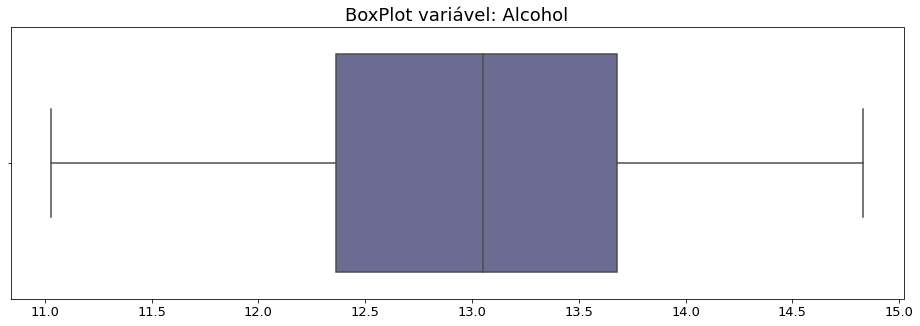

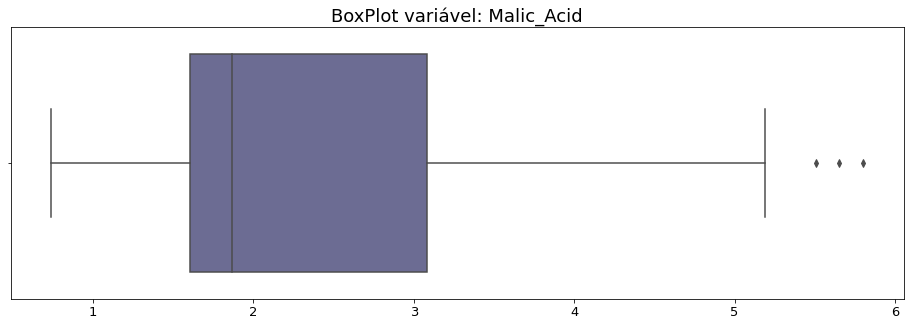

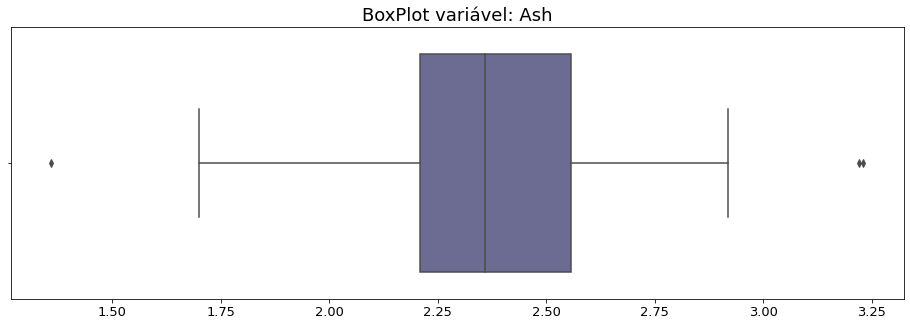

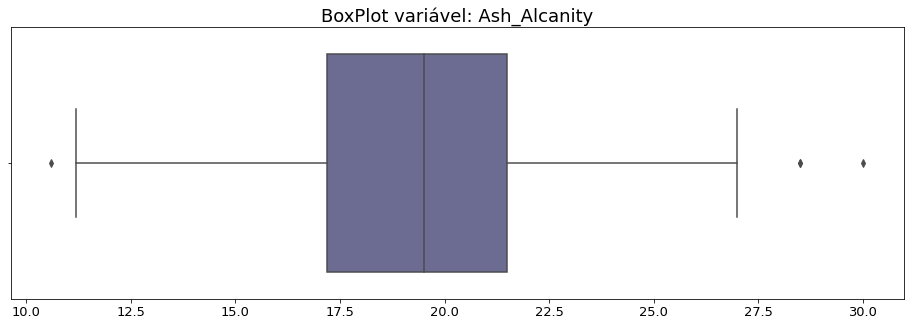

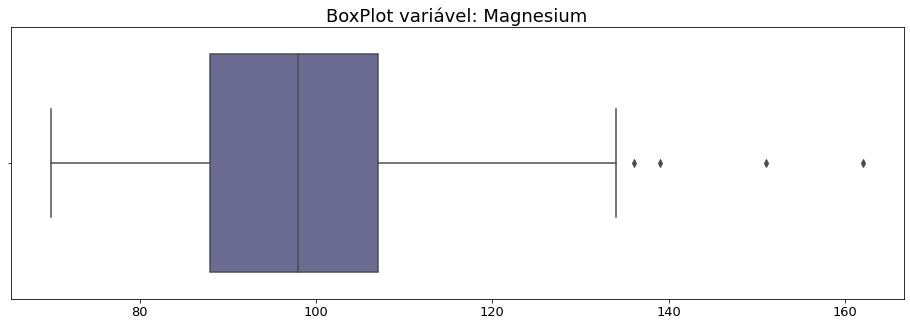

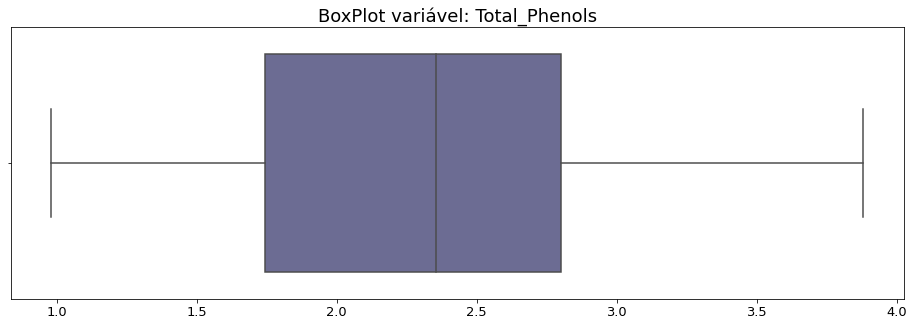

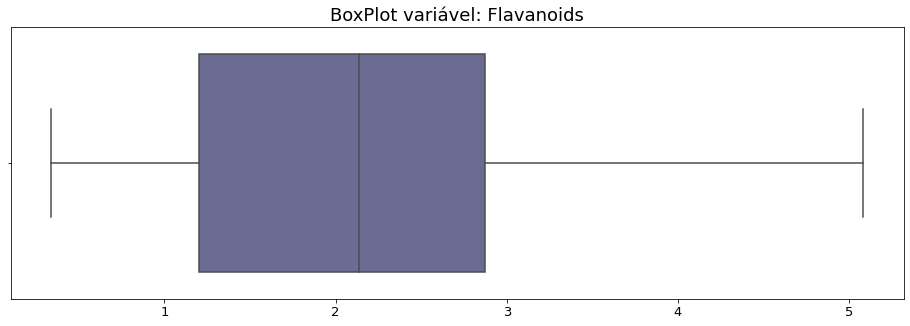

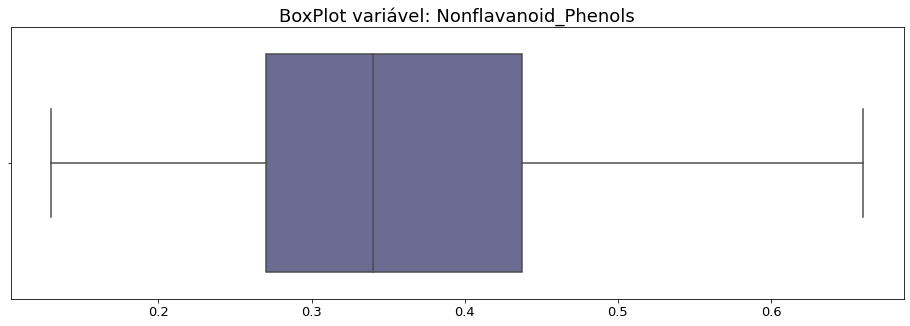

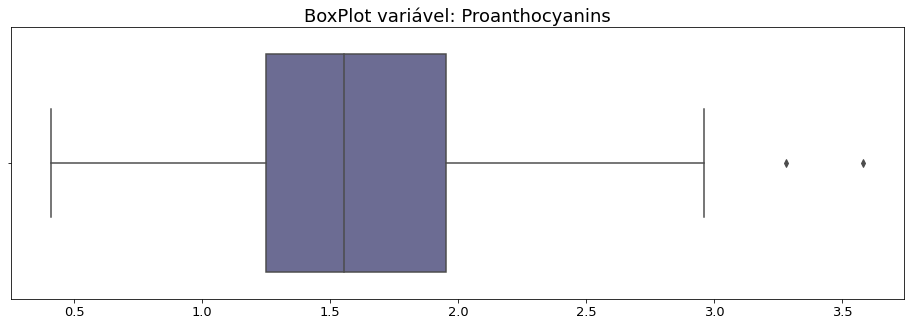

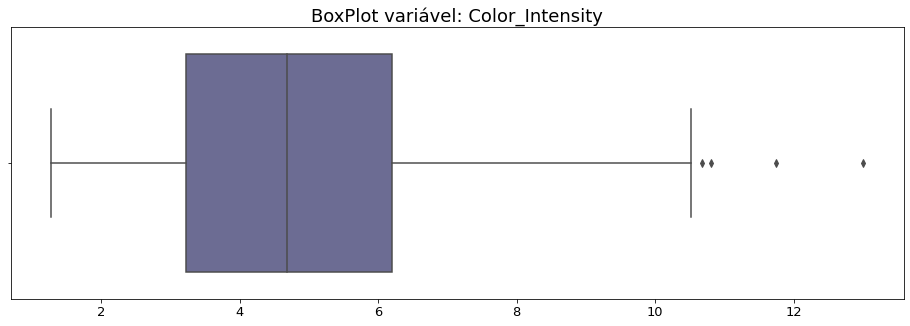

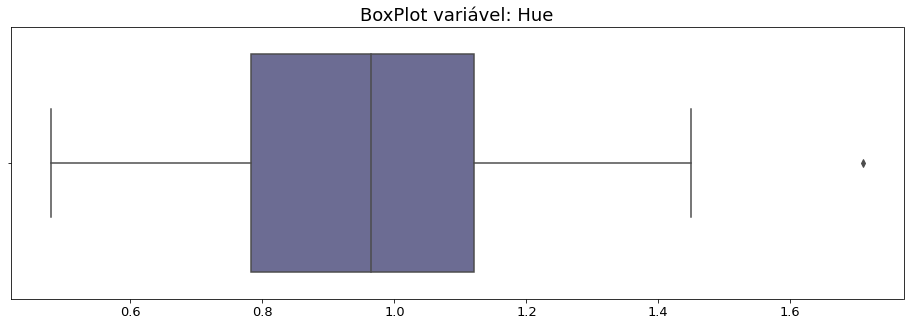

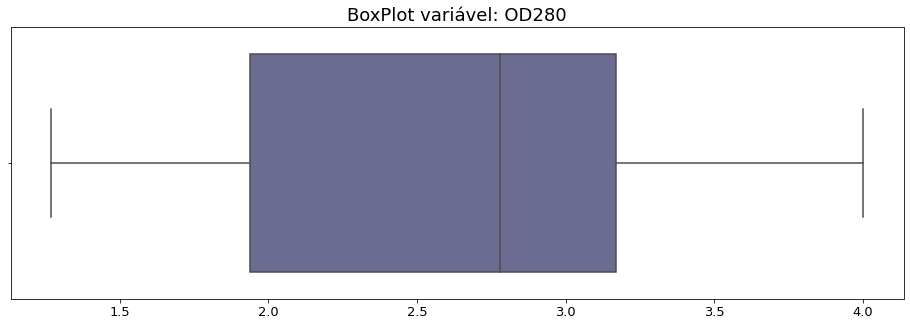

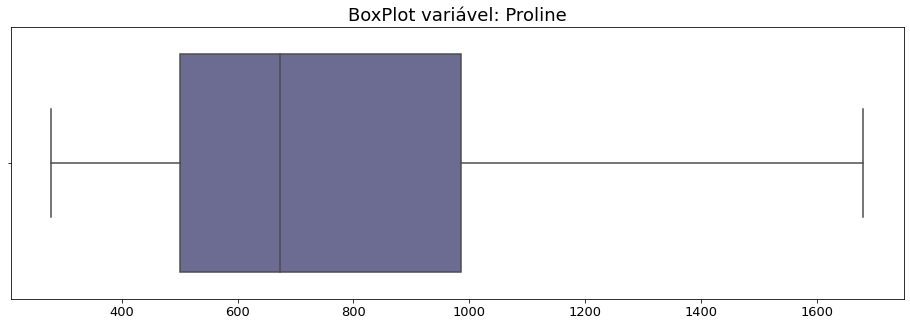

In [80]:
for col in data.columns:
    plt.figure(figsize=(16,5))
    sns.boxplot(x=data[col], color='#666699')
    plt.title(f'BoxPlot variável: {col}', size=18)
    plt.xticks(size=13)
    plt.xlabel(None)
    plt.show()

In [82]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:>

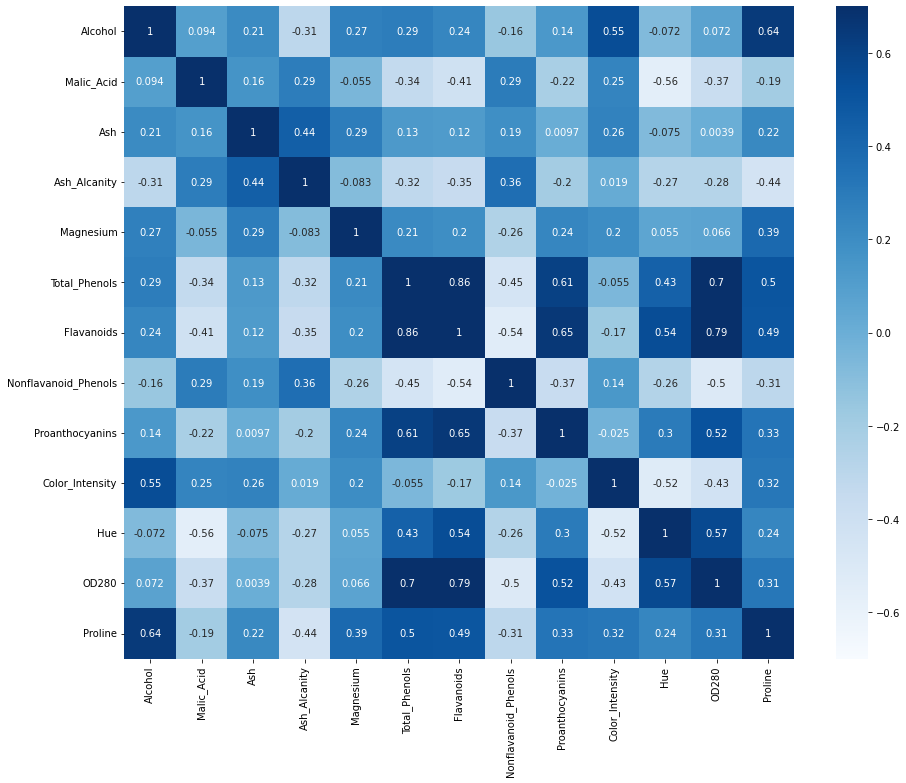

In [97]:
# Verificando a correlação das variáveis:
# (customização na escala de cores da correlação p visualização).
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), cmap='Blues', annot=True, vmin= -0.7, vmax=0.7)

Text(0.5, 1.0, 'Total Phenols x Flavanoids')

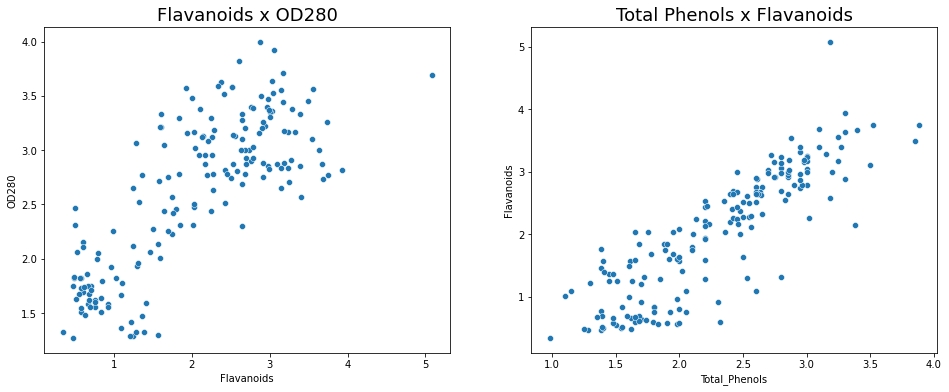

In [119]:
# Plot
plt.figure(figsize=(16,6))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=data.Flavanoids, y=data.OD280)
plt.title("Flavanoids x OD280", size=18)
ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=data.Total_Phenols, y=data.Flavanoids)
plt.title("Total Phenols x Flavanoids", size=18)


### Padronizando os dados para o modelo

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Aplicando Elbow Method

In [129]:
from sklearn.cluster import KMeans

In [140]:
lista_wcss = []

for n in range(2,8):
    modelo = KMeans(n_clusters= n)
    modelo.fit(data_scaled)
    lista_wcss.append(modelo.inertia_)

Text(0.5, 1.0, 'Soma dos quadrados intra-clusters')

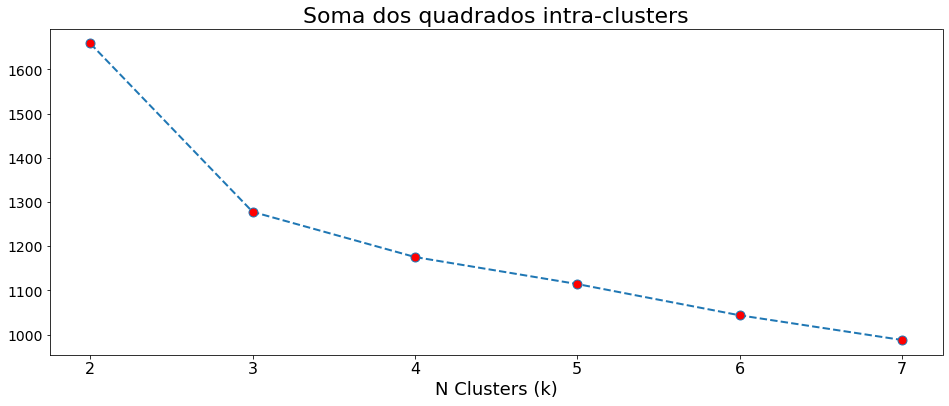

In [154]:
plt.figure(figsize=(16,6))
plt.plot(range(2,8), lista_wcss, marker='o', mfc='red', ms=9, ls='--', lw=2.0)
plt.yticks(size=14)
plt.xticks(size=16)
plt.xlabel("N Clusters (k)", size = 18)
plt.title("Soma dos quadrados intra-clusters", size=22)

### Realizando a clusterização dos dados

In [156]:
num_clusters = 3

# Criando e treinando o modelo
modelo = KMeans(n_clusters= num_clusters)
modelo.fit(data_scaled)

KMeans(n_clusters=3)

In [157]:
# Rotulando os dados:
y = modelo.predict(data_scaled)

In [158]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [165]:
data['Pred_Cluster'] = y

In [166]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [290]:
centers = modelo.cluster_centers_
centros = scaler.inverse_transform(centers)

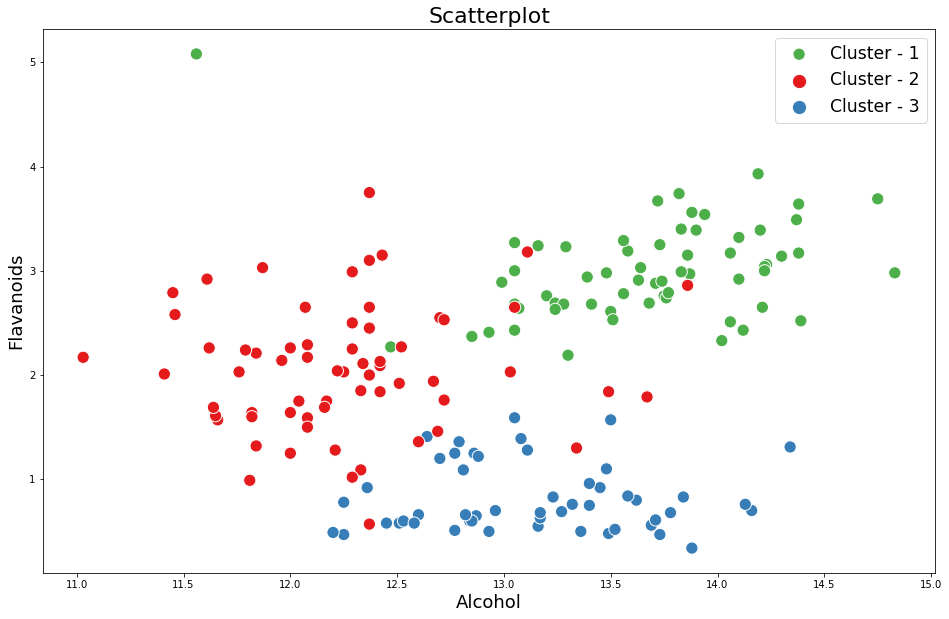

In [316]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=data.Alcohol,
                y=data.Flavanoids,
                hue=data.Pred_Cluster,
                palette='Set1',
                size=data.Pred_Cluster,
                sizes=(150,150))
plt.plot(kind='point', )
plt.legend(['Cluster - 1','Cluster - 2','Cluster - 3'], fontsize='xx-large', markerscale=1)
plt.title("Scatterplot", size=22)
plt.xlabel("Alcohol", size=18)
plt.ylabel("Flavanoids", size=18)
plt.show()

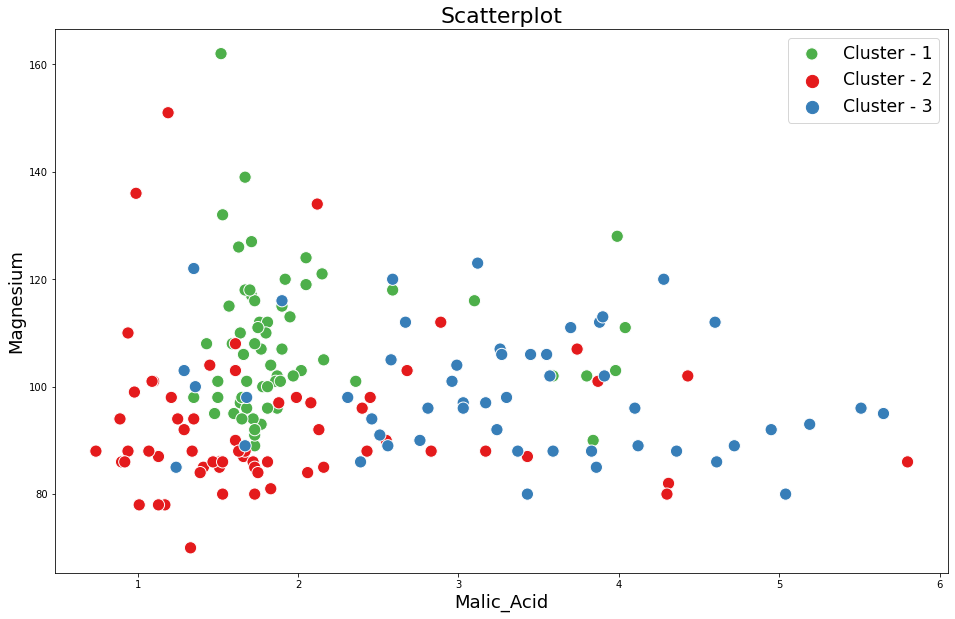

In [317]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=data.Malic_Acid,
                y=data.Magnesium,
                hue=data.Pred_Cluster,
                palette='Set1',
                size=data.Pred_Cluster,
                sizes=(150,150))
plt.legend(['Cluster - 1','Cluster - 2','Cluster - 3'], fontsize='xx-large', markerscale=1)
plt.title("Scatterplot", size=22)
plt.xlabel("Malic_Acid", size=18)
plt.ylabel("Magnesium", size=18)
plt.show()

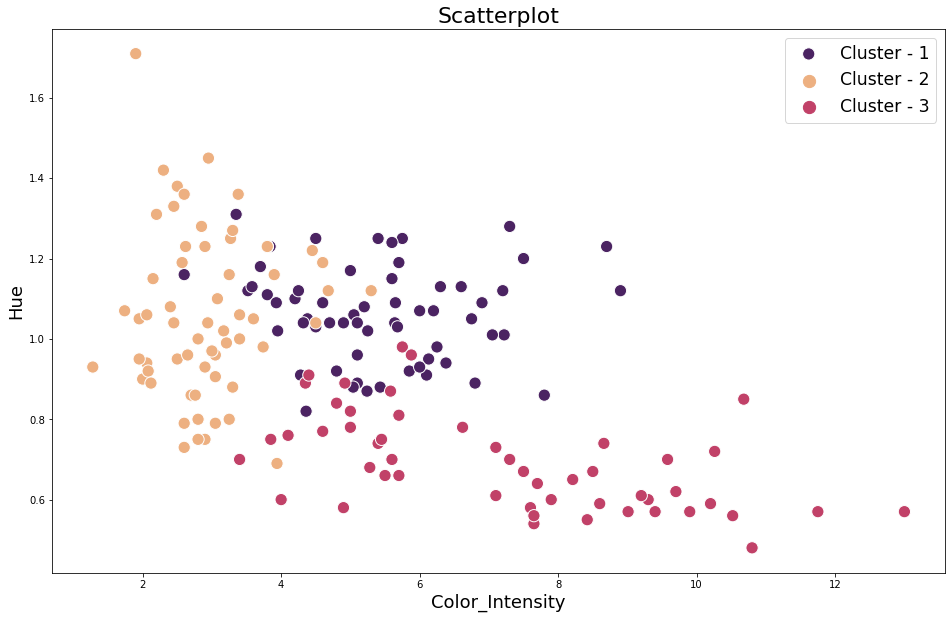

In [318]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=data.Color_Intensity,
                y=data.Hue,
                hue=data.Pred_Cluster,
                palette='flare',
                size=data.Pred_Cluster,
                sizes=(150,150))
plt.legend(['Cluster - 1','Cluster - 2','Cluster - 3'], fontsize='xx-large', markerscale=1)
plt.title("Scatterplot", size=22)
plt.xlabel("Color_Intensity", size=18)
plt.ylabel("Hue", size=18)
plt.show()

### Aplicando técnica de PCA no dataset

In [293]:
from sklearn.decomposition import PCA
# Aplicando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [323]:
# Criando modelo
modelo_v2 = KMeans(n_clusters=3)
modelo_v2.fit(data_pca)
y_v2 = modelo_v2.predict(data_pca)
centers_v2 = modelo_v2.cluster_centers_

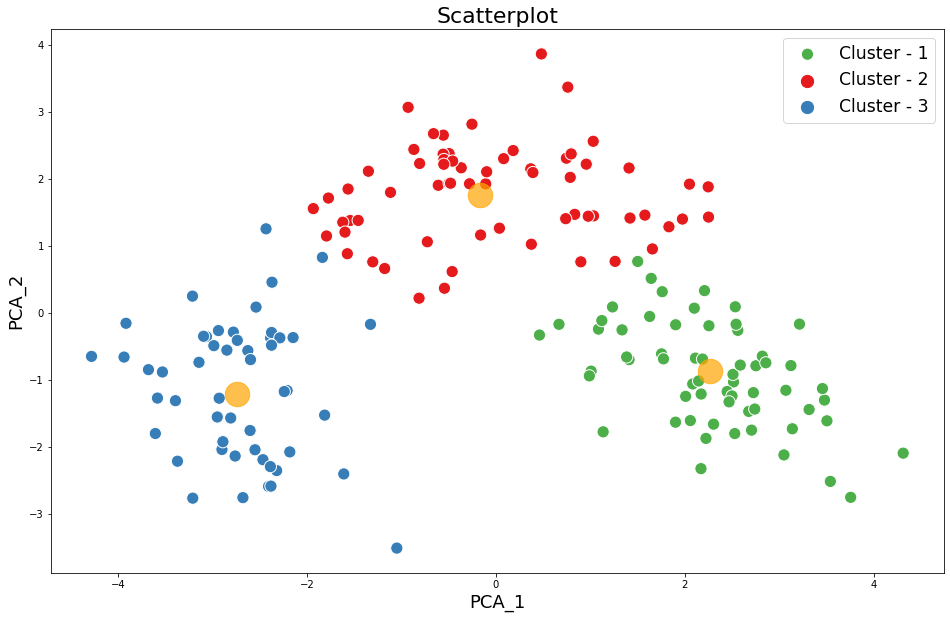

In [325]:
# PLot
plt.figure(figsize=(16,10))
sns.scatterplot(x=data_pca[:,0],
                y=data_pca[:,1],
                hue=data.Pred_Cluster,
                palette='Set1',
                size=data.Pred_Cluster,
                sizes=(150,150))
plt.scatter(centers_v2[:,0], centers_v2[:,1], s=600, alpha=0.7, color='Orange')
plt.legend(['Cluster - 1','Cluster - 2','Cluster - 3'], fontsize='xx-large', markerscale=1)
plt.title("Scatterplot", size=22)
plt.xlabel("PCA_1", size=18)
plt.ylabel("PCA_2", size=18)
plt.show()